<a href="https://colab.research.google.com/github/A-vidhyalakshmi/Aerofit-Case-study/blob/main/Aerofit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AEROFIT BIZ CASE STUDY**





To analyse,interprete and visualize the given Netflix data and to solve the related problems to get insights we need functions and methods, so we must import Python libraries into our work notebook.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as col
from scipy.stats import norm

To get the data into our work space we use the below code(to read csv files)
and saving the whole set of data into a single variable(dataframe) which makes analysis easier

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749 -O aerofit.csv

--2023-08-22 14:07:53--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 13.35.37.31, 13.35.37.7, 13.35.37.102, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|13.35.37.31|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7279 (7.1K) [text/plain]
Saving to: ‘aerofit.csv’

aerofit.csv         100%[===================>]   7.11K  --.-KB/s    in 0s      

2023-08-22 14:07:53 (2.41 GB/s) - ‘aerofit.csv’ saved [7279/7279]



In [ ]:
data = pd.read_csv('aerofit.csv')


In [ ]:
data.head(2)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75


In [ ]:
data.tail(2)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


In [ ]:
data.sample(2)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
79,KP281,50,Female,16,Partnered,3,3,64809,66
123,KP481,33,Female,16,Partnered,5,3,53439,95


In [ ]:
# TO GET NO. OF ROWS & COLUMNS:

data.shape

(180, 9)

In [ ]:
# TO GET TOTAL ELEMENTS IN THE DATASET (i.e., the dot product of no. of rows & columns)

data.size

1620

In [ ]:
# To get index

data.index

RangeIndex(start=0, stop=180, step=1)

In [ ]:
# TO GET THE NAMES OF THE COLUMNS

data.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [ ]:
# TO GET THE NAMES OF THE COLUMNS(alternate method)

data.keys()

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [ ]:
# To get memory usage of each column

data.memory_usage()

Index             128
Product          1440
Age              1440
Gender           1440
Education        1440
MaritalStatus    1440
Usage            1440
Fitness          1440
Income           1440
Miles            1440
dtype: int64

In [ ]:
# TO GET THE TOTAL INFORMATION ABOUT THE DATASET.
# info function let us know the columns with their data types and no. of non-null values & the total memory usage


data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


From the above analysis we get to know that all columns are integer data type except "Product","Gender" and "MaritalStatus" columns which is of object type


### TO ANALYSE THE BASIC METRICS

In [ ]:
# To get the data type of each column

data.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

##### STATISTICAL SUMMERY

In [ ]:
data.describe()


,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


Describe function returns the glimpse of the data with the statistical values from all over the data just to predict the normal ranges and average ranges to the particular elements.
Note: it will display only the numerical values and return from the numerical values.

### INFERENCE:



1.   Age group of the users is from 18 to 50
2.   The Customers use the product atleast twice a week
3.   Income range of the customers vary from 30,000(approx.) to maximum of 104581. This implies the Users are from varied income group
   



In [ ]:
# To get statistical values for the object data type

data.describe(include = object)

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


In [ ]:
# Accessing the rows with their iloc(integer location) values

data.iloc[:4]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85


In [ ]:
# Accessing selected range of rows using external location values

data.loc[3:6]


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
5,KP281,20,Female,14,Partnered,3,3,32973,66
6,KP281,21,Female,14,Partnered,3,3,35247,75


In [ ]:
# Accessing the specified columns for all rows using external location


data.loc[:,['Product','Gender','Usage']]

,Product,Gender,Usage
0,KP281,Male,3
1,KP281,Male,2
2,KP281,Female,4
3,KP281,Male,3
4,KP281,Male,4
...,...,...,...
175,KP781,Male,6
176,KP781,Male,5
177,KP781,Male,5
178,KP781,Male,4


### NON-GRAPHICAL ANALYSIS:

In [ ]:
data['Product'].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

In [ ]:
data['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

### INFERENCE:
The most used product is 'KP281'

In [ ]:
data['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

### INFERENCE:
There are more MALE(104) users than Female(76) users

In [ ]:
data['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

### INFERENCE:
The Aerofit products are more popular among the Partnered users

In [ ]:
data.groupby(['Product','Gender']).agg({'Gender':'count'}).rename(columns={'Gender':'count'}).reset_index()


,Product,Gender,count
0,KP281,Female,40
1,KP281,Male,40
2,KP481,Female,29
3,KP481,Male,31
4,KP781,Female,7
5,KP781,Male,33


### INFERENCE:
For all Produts Male users dominate female users except for KP281 which has equal number of male and female users

In [ ]:
data.groupby('Product').agg({'Miles':'mean'}).reset_index()


,Product,Miles
0,KP281,82.787500
1,KP481,87.933333
2,KP781,166.900000


### INFERENCE:
Outliers are present among KP781 users.

## VISUAL ANALYSIS

### UNIVARIATE

<Axes: xlabel='Income', ylabel='Count'>

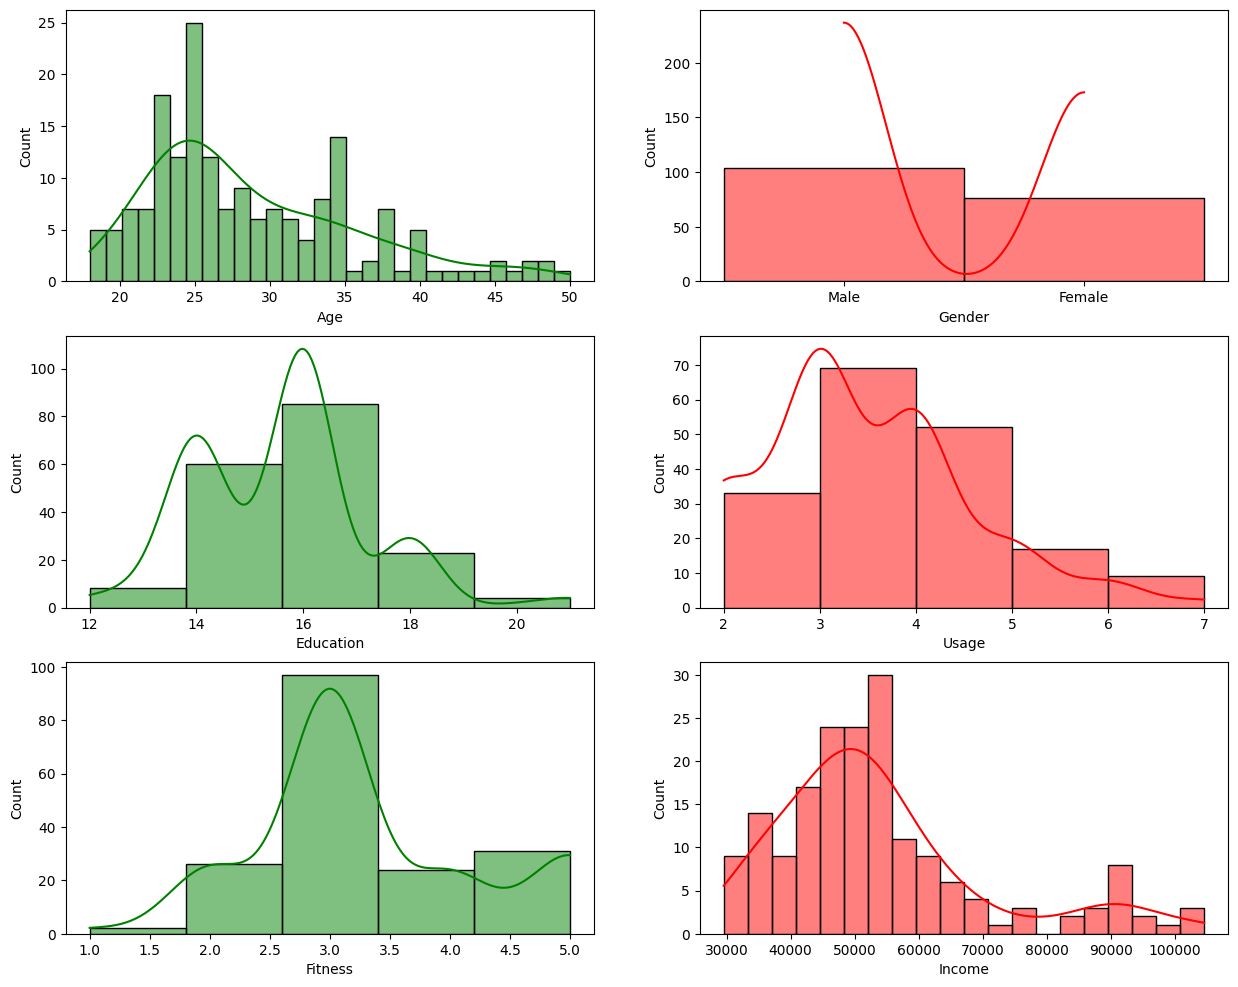

In [ ]:
# plotting charts in subplots

plt.figure(figsize=(15,12))

plt.subplot(3,2,1)
sns.histplot(data = data, x='Age', kde=True, color='green', bins = 30)


plt.subplot(3,2,2)
sns.histplot(data = data, x='Gender', kde=True, color='red', bins = 10)


plt.subplot(3,2,3)
sns.histplot(data = data, x='Education', kde=True, color='green', bins = 5)

plt.subplot(3,2,4)
sns.histplot(data = data, x='Usage', kde=True, color='red', bins = 5)

plt.subplot(3,2,5)
sns.histplot(data = data, x='Fitness', kde=True, color='green', bins = 5)

plt.subplot(3,2,6)
sns.histplot(data = data, x='Income', kde=True, color='red', bins = 20)


### INFERENCE:
This analysis gives the overall idea about the distribution of all the parameters

### COUNTPLOT ANALYSIS:

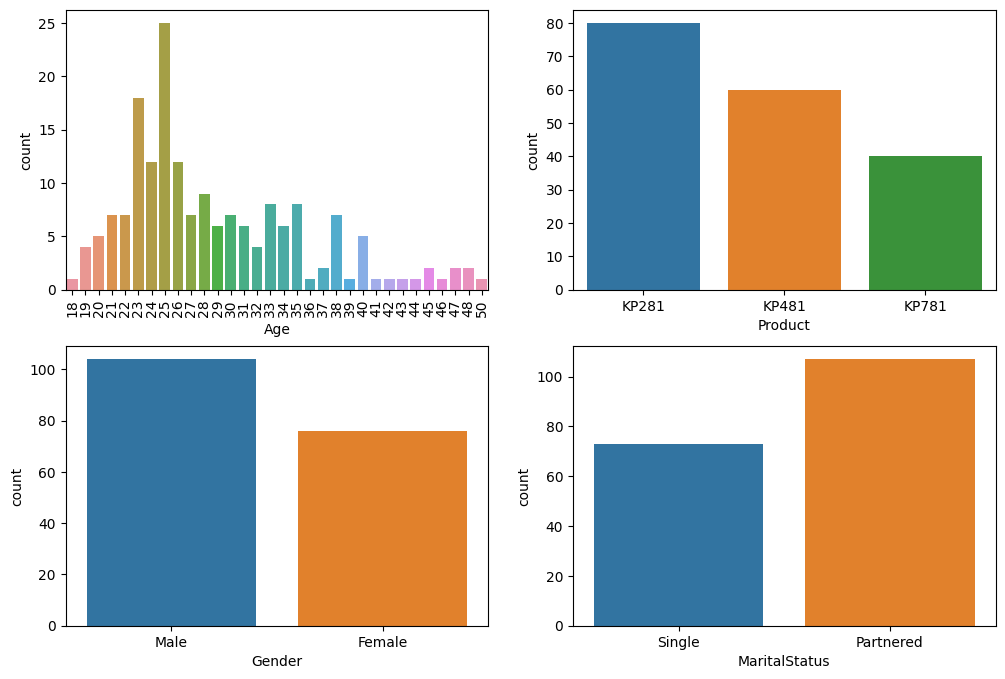

In [ ]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sns.countplot(data = data,x='Age')
plt.xticks(rotation =90)

plt.subplot(2,2,2)
sns.countplot(data = data,x='Product')

plt.subplot(2,2,3)
sns.countplot(data = data,x='Gender')

plt.subplot(2,2,4)
sns.countplot(data = data,x='MaritalStatus')

plt.show()

### INFERENCE:
We have a visual evidence that,  

1.   Users around the age group of 25 are more when compared to others.
2.   As we already analysed the product KP281 is the most frequently used one.
3.   Male Users are more than Female users
4.   Aerofit products are more popular among the married people.





### BOXPLOT - CHECK FOR OUTLIERS

<Axes: ylabel='Miles'>

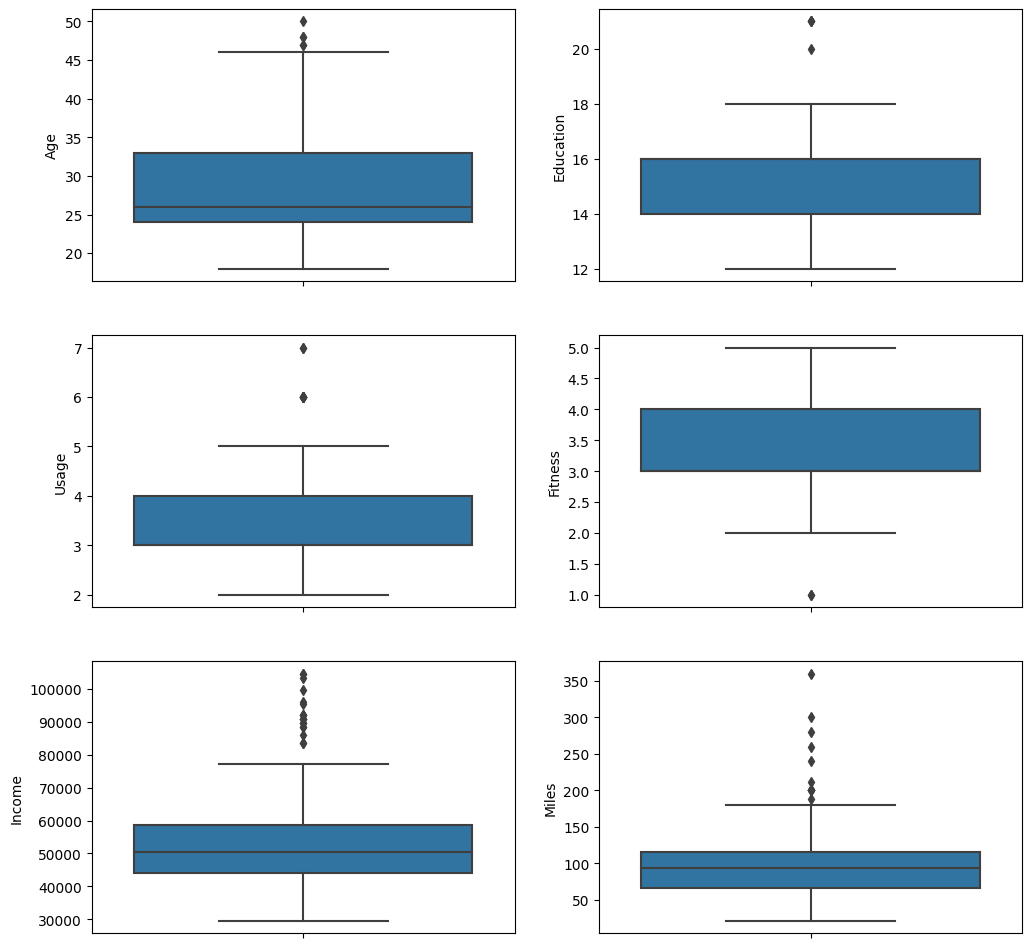

In [ ]:
plt.figure(figsize=(12,12))

plt.subplot(3,2,1)
sns.boxplot(data = data, y='Age',orient='v')

plt.subplot(3,2,2)
sns.boxplot(data = data, y='Education',orient='v')

plt.subplot(3,2,3)
sns.boxplot(data = data, y='Usage',orient='v')

plt.subplot(3,2,4)
sns.boxplot(data = data, y='Fitness',orient='v')

plt.subplot(3,2,5)
sns.boxplot(data = data, y='Income',orient='v')

plt.subplot(3,2,6)
sns.boxplot(data = data, y='Miles',orient='v')


### INFERENCE:


1.   There are only very few outliers for 'Age','Education', 'Usage', 'Fitness'
2.   In case of 'Income' and 'Miles' the outliers are more



### BIVARIATE
Product-wise comparison of various parameters

Text(0.5, 1.0, 'Product vs Education')

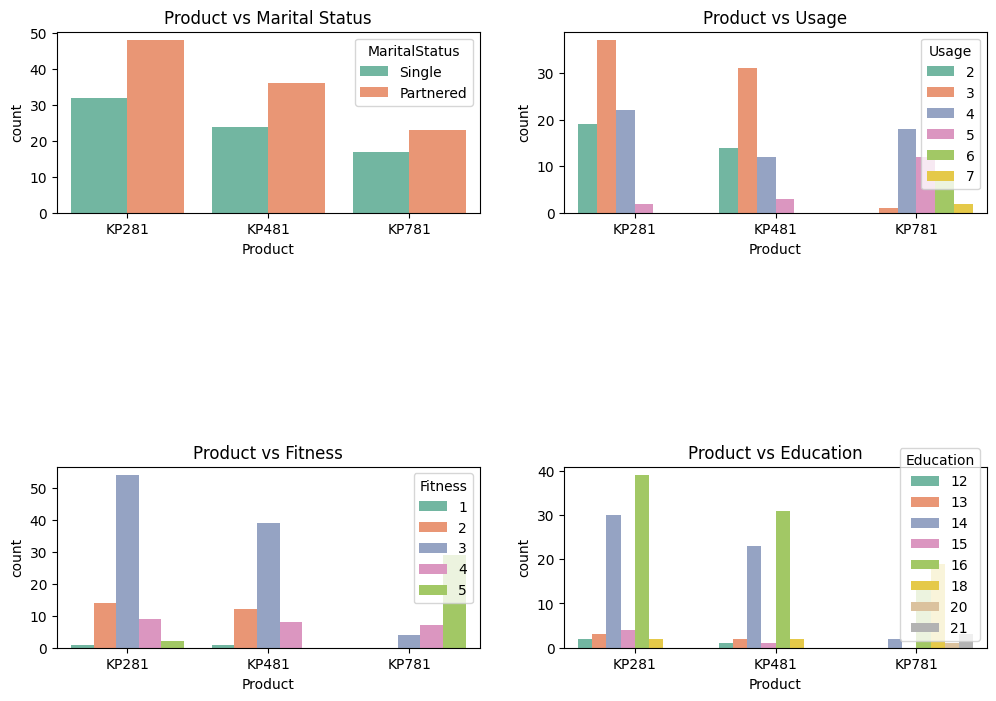

In [ ]:
plt.figure(figsize=(12,8))


plt.subplot(3,2,1)
sns.countplot(data=data, x='Product', hue='MaritalStatus',palette='Set2')
plt.title('Product vs Marital Status')

plt.subplot(3,2,2)
sns.countplot(data=data, x='Product', hue='Usage',palette='Set2')
plt.title('Product vs Usage')


plt.subplot(3,2,5)
sns.countplot(data=data, x='Product', hue='Fitness',palette='Set2')
plt.title('Product vs Fitness')


plt.subplot(3,2,6)
sns.countplot(data=data, x='Product', hue='Education',palette='Set2')
plt.title('Product vs Education')





### INFERENCE:
We can clearly visualise that,
1.  **Marital Status** - For all the Product types the Married/Partnered Users are more
2.  **Usage** - KP281 aand KP481 users, use it mostly thrice a week whereas KP781 users, use it four times a week which means KP781 users are more frequent users
3. **Fitness** - Most users of products KP281 and KP481 belong to the fitness band 3 but most of KP781 users are more fit as they belong to fitness band 5
4. **Education** - Most of KP281 and KP481 users have 16 years of education where as KP781 users mostly have 18 years of education



## MULTIVARIATE

## HEATMAP:

<ipython-input-43-b5ea03a19afe>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),cmap='RdYlGn',annot=True)


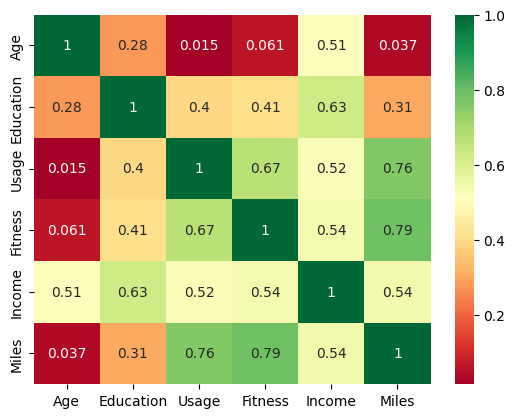

In [ ]:
sns.heatmap(data.corr(),cmap='RdYlGn',annot=True)
plt.show()

### INFERENCE:
1. Fitness always have a strong correlation with usage and miles.
2. Income has a good correlation with all other parameters.
3. overall, we can say that all the parameters in this case are interdependent.

## PAIRPLOT

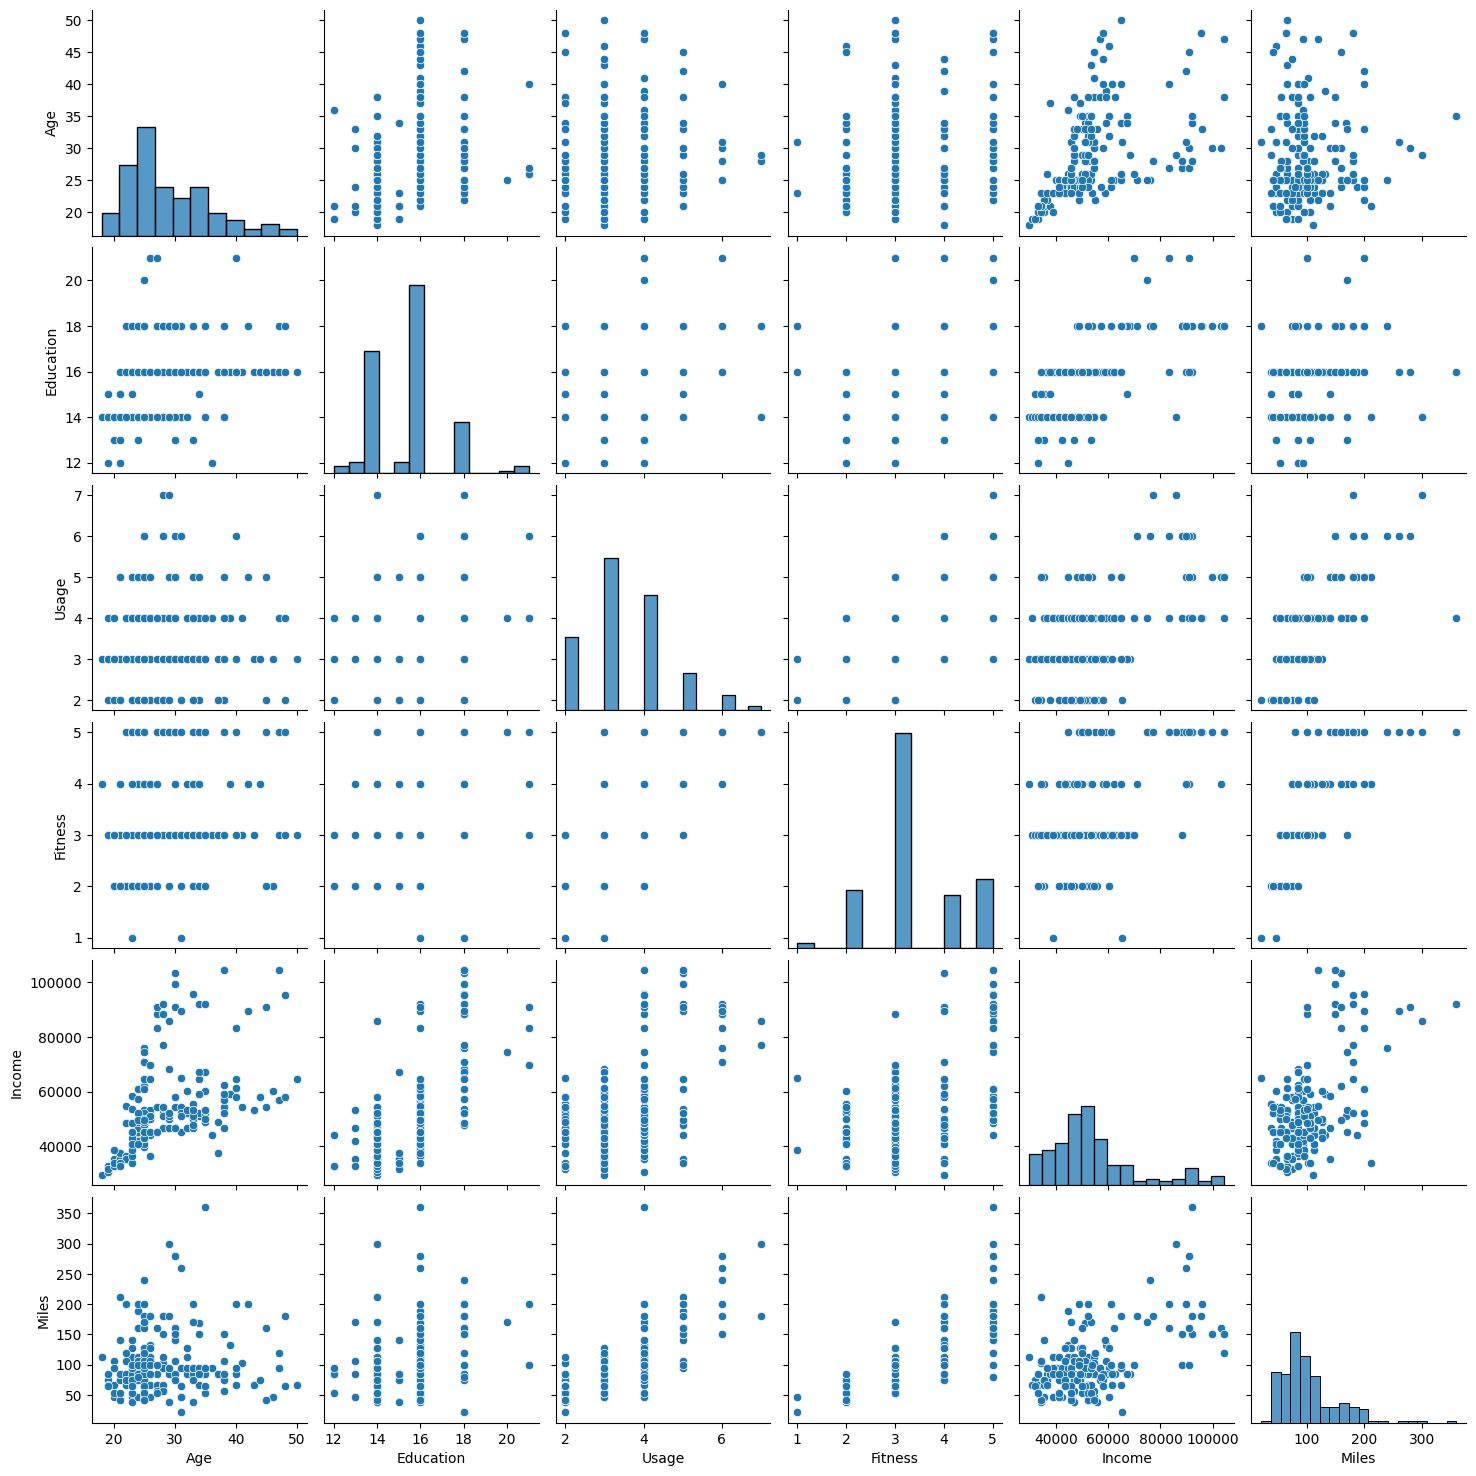

In [ ]:
# pairplot gives complete relation between all the range of statistical attributes in data

sns.pairplot(data = data)

### PRODUCT-WISE & GENDER-WISE ANALYSIS:

Text(0.5, 1.0, 'Product Vs Miles')

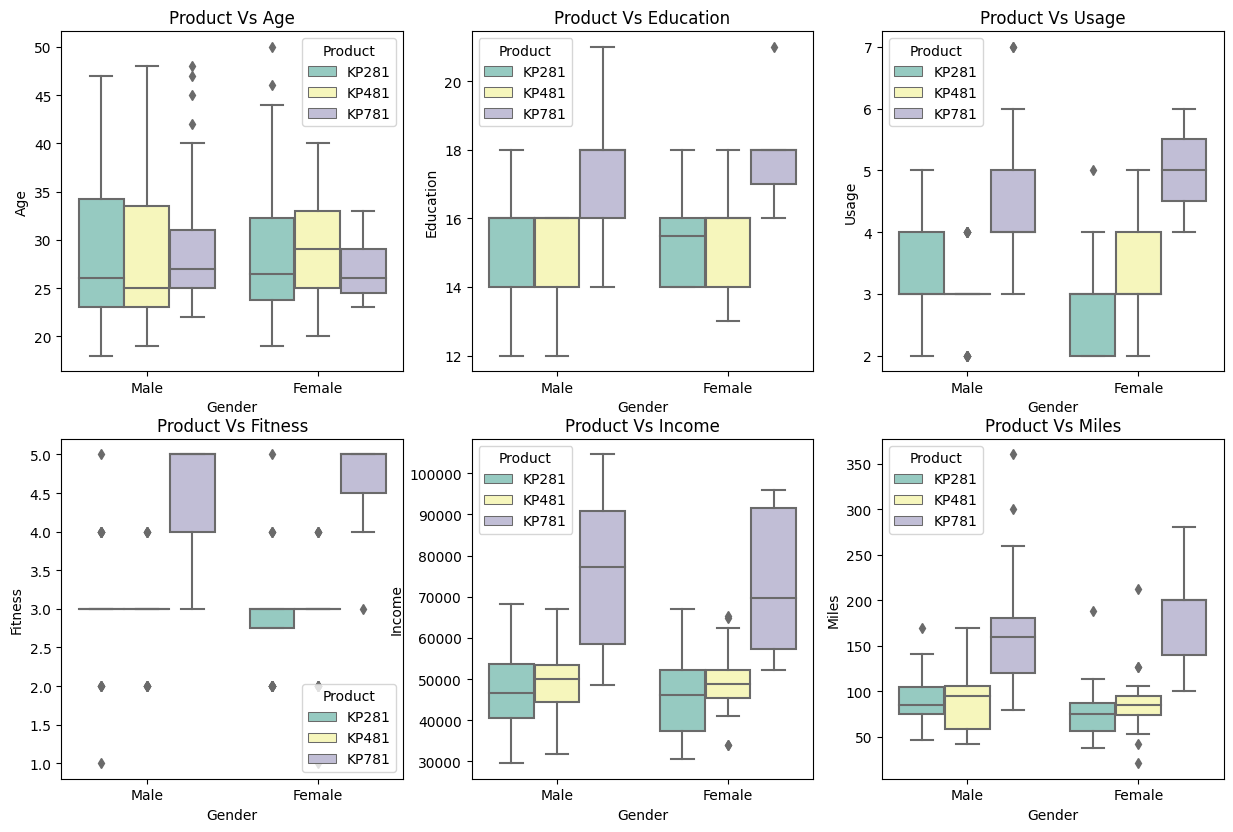

In [ ]:
plt.figure(figsize=(15,15))

plt.subplot(3,3,1)
sns.boxplot(data = data,x='Gender', y='Age',hue='Product',palette='Set3')
plt.title('Product Vs Age')

plt.subplot(3,3,2)
sns.boxplot(data = data, x='Gender', y='Education',hue='Product',palette='Set3')
plt.title('Product Vs Education')


plt.subplot(3,3,3)
sns.boxplot(data = data,x='Gender', y='Usage',hue='Product',palette='Set3')
plt.title('Product Vs Usage')


plt.subplot(3,3,4)
sns.boxplot(data = data,x='Gender', y='Fitness',hue='Product',palette='Set3')
plt.title('Product Vs Fitness')


plt.subplot(3,3,5)
sns.boxplot(data = data,x='Gender', y='Income',hue='Product',palette='Set3')
plt.title('Product Vs Income')


plt.subplot(3,3,6)
sns.boxplot(data = data,x='Gender', y='Miles',hue='Product',palette='Set3')
plt.title('Product Vs Miles')


### INFERENCE:
  People with,
  1. higher education,
  2. more income,
  3. tend to use treadmill more than 4 times a week,
  4. walk more than 100 miles a week,
  5. and are more fit

prefer using **KP781**


#### CHECK FOR DUPLICATE VALUES


In [ ]:
data.duplicated().sum()

0

### INFERENCE

This shows that there are no duplicate values

### CHECK FOR MISSING VALUES:

In [ ]:
data.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

### INFERENCE:

This shows that there are no null values

## DETECTING DATA OF OUTLIER VALUES

<Axes: ylabel='Miles'>

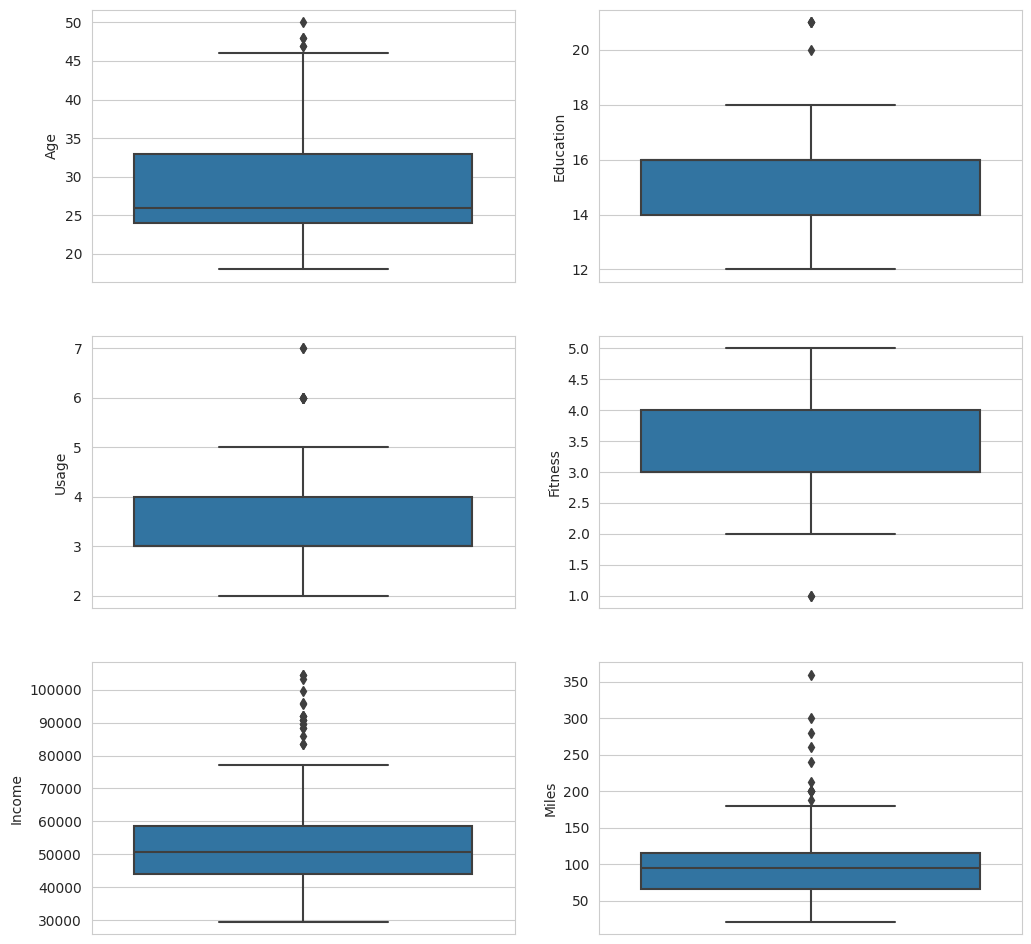

In [ ]:
sns.set_style(style='whitegrid')

plt.figure(figsize=(12,12))

plt.subplot(3,2,1)
sns.boxplot(data = data, y='Age',orient='v')

plt.subplot(3,2,2)
sns.boxplot(data = data, y='Education',orient='v')

plt.subplot(3,2,3)
sns.boxplot(data = data, y='Usage',orient='v')

plt.subplot(3,2,4)
sns.boxplot(data = data, y='Fitness',orient='v')

plt.subplot(3,2,5)
sns.boxplot(data = data, y='Income',orient='v')

plt.subplot(3,2,6)
sns.boxplot(data = data, y='Miles',orient='v')


#### DATA OF OUTLIERS IN AGE COLUMN

In [ ]:
data[data['Age']>46]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
78,KP281,47,Male,16,Partnered,4,3,56850,94
79,KP281,50,Female,16,Partnered,3,3,64809,66
139,KP481,48,Male,16,Partnered,2,3,57987,64
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


### DATA OF OUTLIERS IN EDUCATION

In [ ]:
data[data['Education']>18]


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
156,KP781,25,Male,20,Partnered,4,5,74701,170
157,KP781,26,Female,21,Single,4,3,69721,100
161,KP781,27,Male,21,Partnered,4,4,90886,100
175,KP781,40,Male,21,Single,6,5,83416,200


### DATA OF OUTLIERS IN INCOME COLUMN


In [ ]:
data[data['Income']>80000]


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
159,KP781,27,Male,16,Partnered,4,5,83416,160
160,KP781,27,Male,18,Single,4,3,88396,100
161,KP781,27,Male,21,Partnered,4,4,90886,100
162,KP781,28,Female,18,Partnered,6,5,92131,180
164,KP781,28,Male,18,Single,6,5,88396,150
166,KP781,29,Male,14,Partnered,7,5,85906,300
167,KP781,30,Female,16,Partnered,6,5,90886,280
168,KP781,30,Male,18,Partnered,5,4,103336,160
169,KP781,30,Male,18,Partnered,5,5,99601,150
170,KP781,31,Male,16,Partnered,6,5,89641,260


### DATA OF OUTLIERS IN MILES COLUMN


In [ ]:
data[data['Miles']>175]


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
23,KP281,24,Female,16,Partnered,5,5,44343,188
84,KP481,21,Female,14,Partnered,5,4,34110,212
142,KP781,22,Male,18,Single,4,5,48556,200
148,KP781,24,Female,16,Single,5,5,52291,200
152,KP781,25,Female,18,Partnered,5,5,61006,200
154,KP781,25,Male,18,Partnered,6,4,70966,180
155,KP781,25,Male,18,Partnered,6,5,75946,240
158,KP781,26,Male,16,Partnered,5,4,64741,180
162,KP781,28,Female,18,Partnered,6,5,92131,180
163,KP781,28,Male,18,Partnered,7,5,77191,180


### DATA OF OUTLIERS IN USAGE COLUMN


In [ ]:
data[data['Usage']>5]


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
154,KP781,25,Male,18,Partnered,6,4,70966,180
155,KP781,25,Male,18,Partnered,6,5,75946,240
162,KP781,28,Female,18,Partnered,6,5,92131,180
163,KP781,28,Male,18,Partnered,7,5,77191,180
164,KP781,28,Male,18,Single,6,5,88396,150
166,KP781,29,Male,14,Partnered,7,5,85906,300
167,KP781,30,Female,16,Partnered,6,5,90886,280
170,KP781,31,Male,16,Partnered,6,5,89641,260
175,KP781,40,Male,21,Single,6,5,83416,200


### INFERENCE:
1. There are only few outliers in case of **Age**, **Education** and **Usage**.
2. Thera are many outliers in case of **Income** and **Miles**

# STATISTICAL ANALYSIS:
## PROBABILITY:
###MARGINAL PROBABILITY:

In [ ]:
data['Product'].describe()

count       180
unique        3
top       KP281
freq         80
Name: Product, dtype: object

In [ ]:
# To get the percentage contribution of each product


data['Product'].value_counts(normalize=True)

KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64

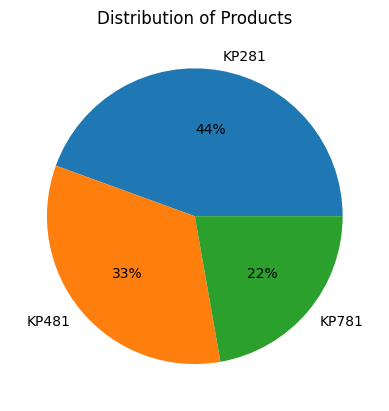

In [ ]:
pdt_cnt = data['Product'].value_counts()

plt.title('Distribution of Products')
plt.pie(pdt_cnt,labels=pdt_cnt.index,autopct='%.0f%%')
plt.show()

### INFERENCE:
**KP281** being the **most popular** product with KP481 in the second position followed by KP781

In [ ]:
data.value_counts()

Product  Age  Gender  Education  MaritalStatus  Usage  Fitness  Income  Miles
KP281    18   Male    14         Single         3      4        29562   112      1
KP481    30   Female  13         Single         4      3        46617   106      1
         31   Female  16         Partnered      2      3        51165   64       1
                      18         Single         2      1        65220   21       1
              Male    16         Partnered      3      3        52302   95       1
                                                                                ..
KP281    34   Female  16         Single         2      2        52302   66       1
              Male    16         Single         4      5        51165   169      1
         35   Female  16         Partnered      3      3        60261   94       1
                      18         Single         3      3        67083   85       1
KP781    48   Male    18         Partnered      4      5        95508   180      1
Length: 1

In [ ]:
data['Gender'].value_counts(normalize=True)

Male      0.577778
Female    0.422222
Name: Gender, dtype: float64

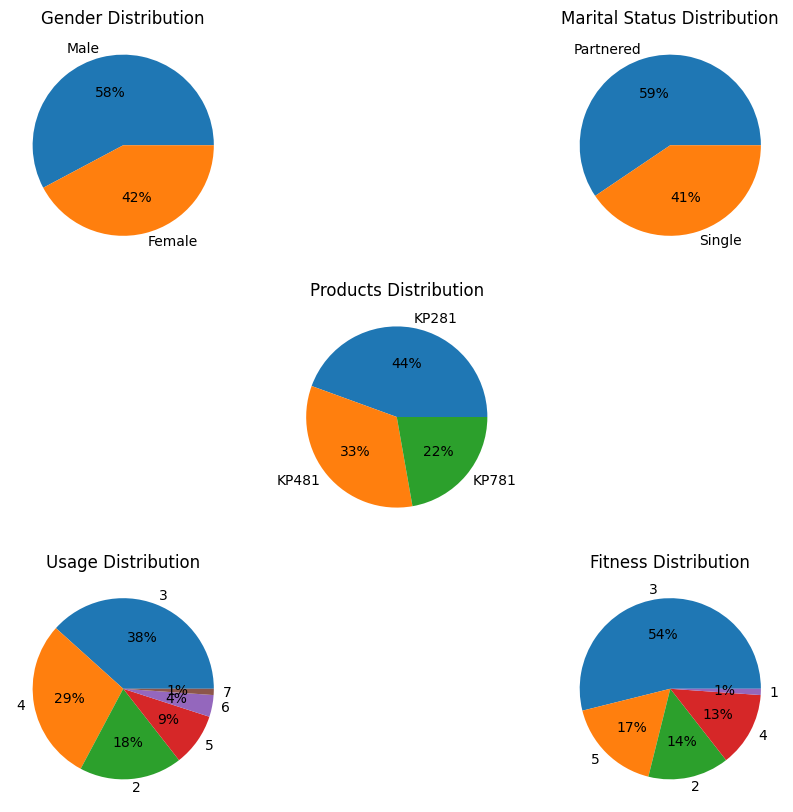

In [ ]:
plt.figure(figsize=(10,10))


plt.subplot(3,3,5)
pdt_cnt = data['Product'].value_counts()

plt.title('Products Distribution')
plt.pie(pdt_cnt,labels=pdt_cnt.index,autopct='%.0f%%')



plt.subplot(3,3,1)
gender_cnt = data['Gender'].value_counts()

plt.title('Gender Distribution')
plt.pie(gender_cnt,labels=gender_cnt.index,autopct='%.0f%%')



plt.subplot(3,3,3)
ms_cnt = data['MaritalStatus'].value_counts()

plt.title('Marital Status Distribution')
plt.pie(ms_cnt,labels=ms_cnt.index,autopct='%.0f%%')


plt.subplot(3,3,7)
us_cnt = data['Usage'].value_counts()

plt.title('Usage Distribution')
plt.pie(us_cnt,labels=us_cnt.index,autopct='%.0f%%')


plt.subplot(3,3,9)
ft_cnt = data['Fitness'].value_counts()

plt.title('Fitness Distribution')
plt.pie(ft_cnt,labels=ft_cnt.index,autopct='%.0f%%')

plt.show()

### INFERENCE:
1. **KP281** - Most Popular Product
2. **Male** contibutes more than female
3. People with **Partnered** marital status use this product more
4. Most Aerofit Customers hit the treadmill **thrice** a week
5. Their Customers are mostly has fitness scale of **3**

### CONDITIONAL PROBABILITY:

### PROBABILITY OF EACH PARAMETER FOR A GIVEN PRODUCT

In [ ]:
data['Gender'].where(data['Product']=='KP281').value_counts(normalize=True)

Male      0.5
Female    0.5
Name: Gender, dtype: float64

In [ ]:
data['Gender'].where(data['Product']=='KP481').value_counts(normalize=True)


Male      0.516667
Female    0.483333
Name: Gender, dtype: float64

In [ ]:
data['Gender'].where(data['Product']=='KP781').value_counts(normalize=True)


Male      0.825
Female    0.175
Name: Gender, dtype: float64

In [ ]:
temp = data['Product'].unique()

# to get probability of each gender for the given product

for i in range(len(temp)):
  y = data['Gender'].where(data['Product']==temp[i]).value_counts(normalize=True)
  print('PROBABILITY OF EACH GENDER FOR THE PRODUCT',temp[i])
  print(y)

PROBABILITY OF EACH GENDER FOR THE PRODUCT KP281
Male      0.5
Female    0.5
Name: Gender, dtype: float64
PROBABILITY OF EACH GENDER FOR THE PRODUCT KP481
Male      0.516667
Female    0.483333
Name: Gender, dtype: float64
PROBABILITY OF EACH GENDER FOR THE PRODUCT KP781
Male      0.825
Female    0.175
Name: Gender, dtype: float64


### INFERENCE:
KP281 and KP481 - almost equal contribution by both gender
**KP781** - **Male** users dominate female with **82.5%**

In [ ]:
temp = data['Product'].unique()

# to get probability of each MaritalStatus for the given product

for i in range(len(temp)):
  y = data['MaritalStatus'].where(data['Product']==temp[i]).value_counts(normalize=True)
  print('PROBABILITY OF EACH MARITAL STATUS FOR THE PRODUCT',temp[i])
  print(y)

PROBABILITY OF EACH MARITAL STATUS FOR THE PRODUCT KP281
Partnered    0.6
Single       0.4
Name: MaritalStatus, dtype: float64
PROBABILITY OF EACH MARITAL STATUS FOR THE PRODUCT KP481
Partnered    0.6
Single       0.4
Name: MaritalStatus, dtype: float64
PROBABILITY OF EACH MARITAL STATUS FOR THE PRODUCT KP781
Partnered    0.575
Single       0.425
Name: MaritalStatus, dtype: float64


### INFERENCE:
**Partnered** users are more compared to single users for all product category

###IMPACT OF INCOME ON THE PRODUCT TYPE

In [ ]:
avg_income = data['Income'].where(data['Product']=='KP281').mean()

avg_income

46418.025

In [ ]:
temp = data['Product'].unique()

# to get the average income of users of the given product

for i in range(len(temp)):
  avg_income = data['Income'].where(data['Product']==temp[i]).mean()
  print('AVERAGE INCOME OF USERS OF THE PRODUCT',temp[i])
  print(avg_income)

AVERAGE INCOME OF USERS OF THE PRODUCT KP281
46418.025
AVERAGE INCOME OF USERS OF THE PRODUCT KP481
48973.65
AVERAGE INCOME OF USERS OF THE PRODUCT KP781
75441.575


### INFERENCE:
KP281 and KP481 - Preferred by Mid-level income group.
**KP781** - Preferred by **High**-level **income** group

### AGE VS PRODUCT

In [ ]:
temp = data['Product'].unique()

# to get the average age of users of the given product

for i in range(len(temp)):
  avg_age = data['Age'].where(data['Product']==temp[i]).mean()
  print('AVERAGE AGE OF USERS OF THE PRODUCT',temp[i])
  print(avg_age)

AVERAGE AGE OF USERS OF THE PRODUCT KP281
28.55
AVERAGE AGE OF USERS OF THE PRODUCT KP481
28.9
AVERAGE AGE OF USERS OF THE PRODUCT KP781
29.1


### INFERENCE:
Users of these Product are almost of the same age group of around **30 years** with some outliers.


### FITNESS PERCENT OF EACH GENDER FOR THE GIVEN PRODUCT

In [ ]:
temp = data['Product'].unique()
temp_gender = data['Gender'].unique()

# to get fitness percent of each gender for the given product

for i in range(len(temp)):
  for j in range(len(temp_gender)):
    y = data['Fitness'].where((data['Product']==temp[i])&(data['Gender']== temp_gender[j])).value_counts(normalize=True)
    print('FITNESS PERCENTAGE OF ',temp_gender[j],' FOR THE PRODUCT',temp[i])
    print(y)

FITNESS PERCENTAGE OF  Male  FOR THE PRODUCT KP281
3.0    0.700
4.0    0.150
2.0    0.100
1.0    0.025
5.0    0.025
Name: Fitness, dtype: float64
FITNESS PERCENTAGE OF  Female  FOR THE PRODUCT KP281
3.0    0.650
2.0    0.250
4.0    0.075
5.0    0.025
Name: Fitness, dtype: float64
FITNESS PERCENTAGE OF  Male  FOR THE PRODUCT KP481
3.0    0.677419
2.0    0.193548
4.0    0.129032
Name: Fitness, dtype: float64
FITNESS PERCENTAGE OF  Female  FOR THE PRODUCT KP481
3.0    0.620690
2.0    0.206897
4.0    0.137931
1.0    0.034483
Name: Fitness, dtype: float64
FITNESS PERCENTAGE OF  Male  FOR THE PRODUCT KP781
5.0    0.727273
4.0    0.181818
3.0    0.090909
Name: Fitness, dtype: float64
FITNESS PERCENTAGE OF  Female  FOR THE PRODUCT KP781
5.0    0.714286
4.0    0.142857
3.0    0.142857
Name: Fitness, dtype: float64


### INFERENCE:
Irrespective of Gender, the Users of **KP781** are more **fit** with around **72%** of users comes under fitness band **5**

In [ ]:
avg_income = data['Income'].mean()
data['Product'].where((data['Gender']=='Male')&(data['Income']>=avg_income)).value_counts(normalize=True)

KP781    0.613636
KP281    0.227273
KP481    0.159091
Name: Product, dtype: float64

In [ ]:
avg_income = data['Income'].mean()
data['Product'].where((data['Gender']=='Female')&(data['Income']>=avg_income)).value_counts(normalize=True)

KP281    0.421053
KP481    0.315789
KP781    0.263158
Name: Product, dtype: float64

In [ ]:
df = data[['Product','Gender','MaritalStatus']].melt()
df1=df.groupby(['variable','value'])[['value']].count()/len(data)
df1.rename(columns={'value':'% contribution'}).reset_index()

,variable,value,% contribution
0,Gender,Female,0.422222
1,Gender,Male,0.577778
2,MaritalStatus,Partnered,0.594444
3,MaritalStatus,Single,0.405556
4,Product,KP281,0.444444
5,Product,KP481,0.333333
6,Product,KP781,0.222222


### BUSINESS INSIGHTS:
1. **PRODUCT:**
      1. 3 unique products - KP281, KP481, KP781
      2. **KP281** most **preferred** with overall contribution of 44%
2. **AGE:**
      1. Age group varies from 18 years to 50 years
      2. Most people belong to the age group of **25 years**
      3. KP781 users have most outliers when age is considered
3. **MARITAL STATUS:**
      1. **Partnered/Married** users are more than that of unmarried users
      2. Partnered users contribute **59%** of the total
4. **GENDER:**
      1. **Male** users dominate female users
      2. Male - 57%, Female - 42%
5. **USAGE:**
      1. KP281, KP481 - average usage is thrice a week
      2. **KP781** - average usage is **4 times** a week
6. **EDUCATION:**
      1. KP281, KP481 - average education of the users is 16 years
      2. KP781 - average education of the users is 18 year

### OBSERVATION:
  People with,
  1. higher education,
  2. more income,
  3. tend to use treadmill more than 4 times a week,
  4. walk more than 100 miles a week,
  5. and are more fit

prefer using **KP781**


### RECOMMENDATIONS:
1. KP281, KP481 - most suited for mid-level income group.
2. **KP781** - marketed among **premium** customers.
3. KP781 - Most suited for more fit persons who use treadmill almost 5 to 7 days a week and walk more than 100 miles which means its suited for a **sporty** persons and **fitness** **freak**.
4. Survey is recommended for income group **below 40,000** to get a wider graph.
5. Promote Products among **Single** (Marital status) with **workshops** and **free trials**.
6. Encourage **Female** users - emphasize on the **importance** of **fitness**.